In [1]:
import numpy as np
from numpy import random
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [2]:
def psi(x, m):
    out = []
    for i in range(m + 1):
        out.append(x**i)
        
    return out

In [3]:
psi(3,3)

[1, 3, 9, 27]

In [4]:
a = np.empty([1,3])
a[0][0] = 15
a

array([[15. ,  0.5,  1. ]])

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

In [5]:
def h(x, A, m):
    assert type(A) == numpy.ndarray, "Input variable A must be ndarray!"
    A_T = A.transpose()
    return A_T.dot(psi(x,m))

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [6]:
def generate_polynomial(deg, a, b):
    """
    Generate a random polynomial of any degree of your choosing sucg that f(a) == b.  
    deg - degree of polynomial
    """
    
    coefficients = [0] + [random.randint(1,10) for i in range(deg)]
    
    y = sum(coefficient * a**n for n, coefficient in enumerate(coefficients))
    
    # set the final coefficient such that f(a) == b
    coefficients[0] = y - b
    
    return coefficients

In [7]:
p3 = generate_polynomial(3, 5, 15)
p3

[915, 1, 7, 6]

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

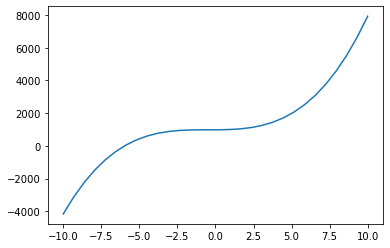

In [8]:
x = np.linspace(-10,10,30)
y = 6 * x**3 + 9*x**2 + 4*x + 980

plt.plot(x, y)

In [9]:
p3 = y

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [10]:


xs = np.random.uniform(-10,10,30)
xs

array([-1.44146231,  8.22138944, -7.75482402, -0.36996847,  3.56768321,
       -1.8842876 ,  6.29686408, -3.43643363,  9.57190562,  9.93427232,
        8.82354653, -2.18723191, -5.46763057,  1.59371065, -5.02873377,
        8.87466187,  9.81732601,  0.36860097,  1.7987775 , -0.21987793,
       -2.95018572, -0.61285389, -6.5727744 , -4.16053913, -4.99942218,
        8.06506405,  1.19693077,  5.9927046 , -5.57115386,  4.66825146])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [11]:
def p3_calc(x):
    return 6 * x**3 + 9 * x ** 2 + 4 * x + 980

In [12]:
ys = []
for x in xs:
    ys.append(p3_calc(x))
ys

[974.9639332835084,
 4955.3704059519805,
 -1307.9085039020088,
 979.4481758293047,
 1381.2906154536406,
 964.276279086729,
 2860.0846806056416,
 829.0493123646834,
 7104.827060092399,
 7790.411086323427,
 5837.730825226193,
 951.5248359879696,
 246.4559638698811,
 1033.5213895226807,
 424.4738885398175,
 5918.125419876691,
 7563.845112952294,
 982.9976874300158,
 1051.2362663120928,
 979.491823304264,
 892.4682750218558,
 979.5478031020904,
 -361.19571944074187,
 687.0328783484508,
 435.21030042451366,
 4745.232617769238,
 1007.9701615029462,
 2618.461722883666,
 199.5585213043306,
 1805.205378235796]

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

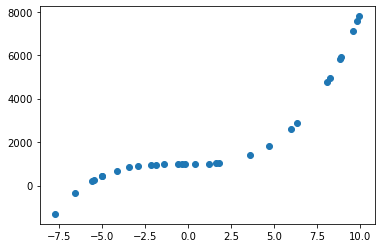

In [13]:
plt.scatter(xs, ys)

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [14]:
m = 2
vals = []
for x in xs:
    vals.append(psi(x,m))
X = np.array(vals)

In [15]:

X

array([[ 1.00000000e+00, -1.44146231e+00,  2.07781358e+00],
       [ 1.00000000e+00,  8.22138944e+00,  6.75912443e+01],
       [ 1.00000000e+00, -7.75482402e+00,  6.01372956e+01],
       [ 1.00000000e+00, -3.69968473e-01,  1.36876671e-01],
       [ 1.00000000e+00,  3.56768321e+00,  1.27283635e+01],
       [ 1.00000000e+00, -1.88428760e+00,  3.55053977e+00],
       [ 1.00000000e+00,  6.29686408e+00,  3.96504972e+01],
       [ 1.00000000e+00, -3.43643363e+00,  1.18090761e+01],
       [ 1.00000000e+00,  9.57190562e+00,  9.16213771e+01],
       [ 1.00000000e+00,  9.93427232e+00,  9.86897666e+01],
       [ 1.00000000e+00,  8.82354653e+00,  7.78549733e+01],
       [ 1.00000000e+00, -2.18723191e+00,  4.78398342e+00],
       [ 1.00000000e+00, -5.46763057e+00,  2.98949840e+01],
       [ 1.00000000e+00,  1.59371065e+00,  2.53991362e+00],
       [ 1.00000000e+00, -5.02873377e+00,  2.52881634e+01],
       [ 1.00000000e+00,  8.87466187e+00,  7.87596234e+01],
       [ 1.00000000e+00,  9.81732601e+00

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [16]:
# Compute the pseudoinverse of matrix X

XxX_T = np.linalg.pinv(X)


In [17]:
# Check that our pseudoinverse matrix = identity matrix

XxX_T.dot(X)

array([[ 1.00000000e+00, -9.90404969e-15, -3.87250361e-16],
       [ 2.42861287e-17,  1.00000000e+00,  1.09837439e-15],
       [-4.33680869e-19,  1.20615910e-17,  1.00000000e+00]])

In [18]:
alphas = []
for y in ys:
    alphas.append(XxX_T.dot(X)*y)
alphas

[array([[ 9.74963933e+02, -9.65609124e-12, -3.77555135e-13],
        [ 2.36780995e-14,  9.74963933e+02,  1.07087541e-12],
        [-4.22823206e-16,  1.17596162e-14,  9.74963933e+02]]),
 array([[ 4.95537041e+03, -4.90782347e-11, -1.91896898e-12],
        [ 1.20346763e-13,  4.95537041e+03,  5.44285192e-12],
        [-2.14904934e-15,  5.97696509e-14,  4.95537041e+03]]),
 array([[-1.30790850e+03,  1.29535908e-11,  5.06488041e-13],
        [-3.17640342e-14, -1.30790850e+03, -1.43657320e-12],
        [ 5.67214897e-16, -1.57754574e-14, -1.30790850e+03]]),
 array([[ 9.79448176e+02, -9.70050340e-12, -3.79291660e-13],
        [ 2.37870044e-14,  9.79448176e+02,  1.07580079e-12],
        [-4.24767936e-16,  1.18137033e-14,  9.79448176e+02]]),
 array([[ 1.38129062e+03, -1.36803709e-11, -5.34905290e-13],
        [ 3.35462016e-14,  1.38129062e+03,  1.51717423e-12],
        [-5.99039314e-16,  1.66605624e-14,  1.38129062e+03]]),
 array([[ 9.64276279e+02, -9.55024019e-12, -3.73416337e-13],
        [ 2.34

In [19]:
alpha_vals = []
for a in alphas:
    alpha_vals.append(a[0][0])
alpha_vals

[974.9639332835084,
 4955.3704059519805,
 -1307.9085039020088,
 979.4481758293047,
 1381.2906154536406,
 964.276279086729,
 2860.0846806056416,
 829.0493123646834,
 7104.827060092399,
 7790.411086323427,
 5837.730825226193,
 951.5248359879696,
 246.4559638698811,
 1033.5213895226807,
 424.4738885398175,
 5918.125419876691,
 7563.845112952294,
 982.9976874300158,
 1051.2362663120928,
 979.491823304264,
 892.4682750218558,
 979.5478031020904,
 -361.19571944074187,
 687.0328783484508,
 435.21030042451366,
 4745.232617769238,
 1007.9701615029462,
 2618.461722883666,
 199.5585213043306,
 1805.205378235796]

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [20]:
y1 = ys
y2 = alpha_vals
xs = xs
plt.rcParams['figure.figsize'] = (15,12)

In [21]:
xs

array([-1.44146231,  8.22138944, -7.75482402, -0.36996847,  3.56768321,
       -1.8842876 ,  6.29686408, -3.43643363,  9.57190562,  9.93427232,
        8.82354653, -2.18723191, -5.46763057,  1.59371065, -5.02873377,
        8.87466187,  9.81732601,  0.36860097,  1.7987775 , -0.21987793,
       -2.95018572, -0.61285389, -6.5727744 , -4.16053913, -4.99942218,
        8.06506405,  1.19693077,  5.9927046 , -5.57115386,  4.66825146])

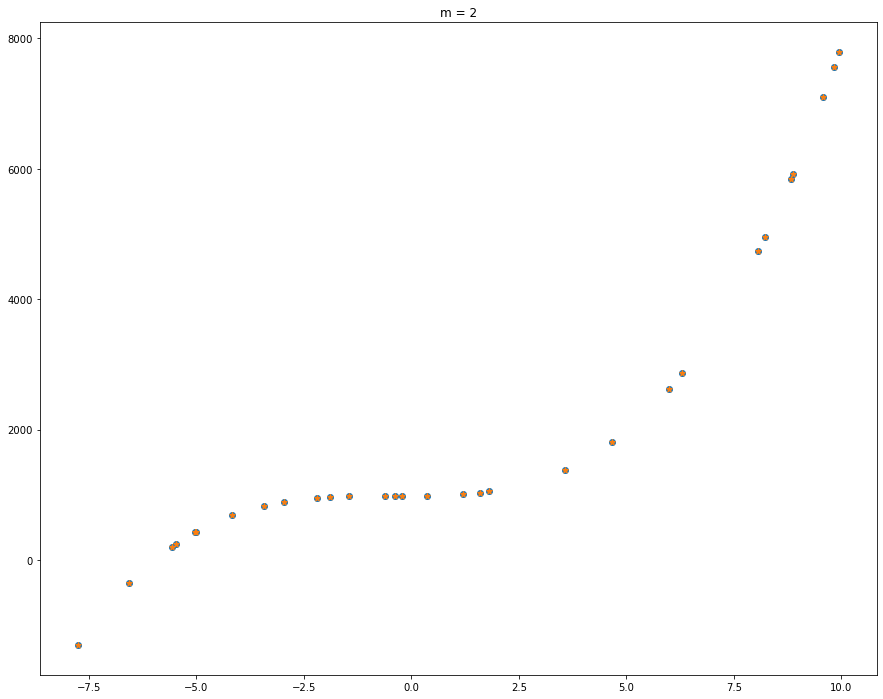

In [22]:
plt.scatter(xs, y1, label = '3rd Degree Polynomial')
plt.scatter(xs, y2, label = 'alpha values', marker = '*')
plt.title('m = 2')
plt.show()

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

In [23]:
def diff_m(m, xs, ys):
    # Build the column vectors of X, make X an array
    vals = []
    for x in xs:
        vals.append(psi(x,m))
    X = np.array(vals)
    # Compute the pseudoinverse of X
    XxX_T = np.linalg.pinv(X)
    
    # Compute and extract the alpha values
    alphas = []
    for y in ys:
        alphas.append(XxX_T.dot(X)*y)
    alpha_vals = []
    
    for a in alphas:
        alpha_vals.append(a[0][0])
        
    y1 = ys
    y2 = alpha_vals
    
    plt.scatter(xs, y1, label = '3rd Degree Polynomial')
    plt.scatter(xs, y2, label = 'alpha values', marker = '*')
    plt.title(f'm = {m}')
    plt.show()

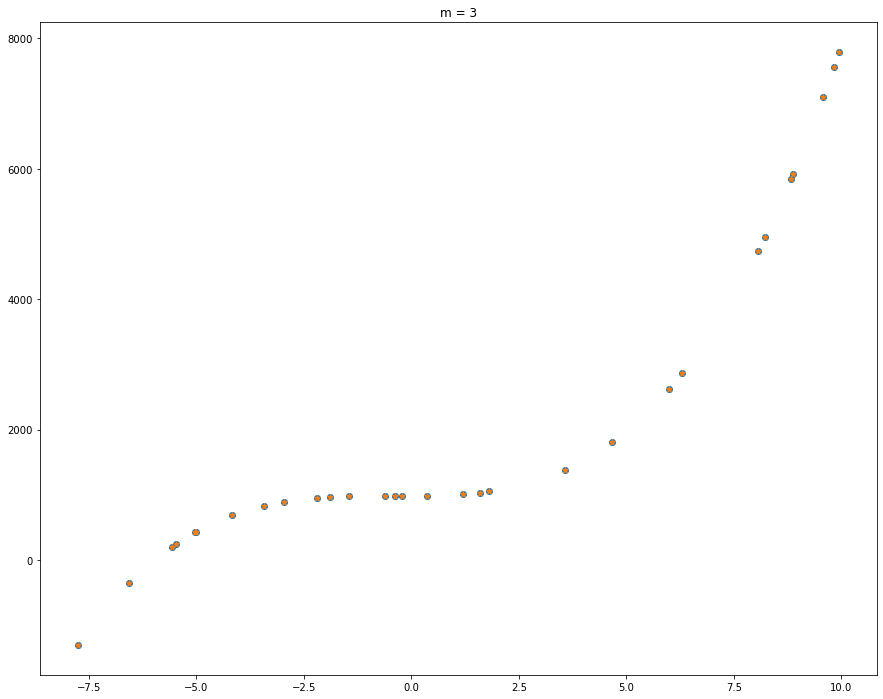

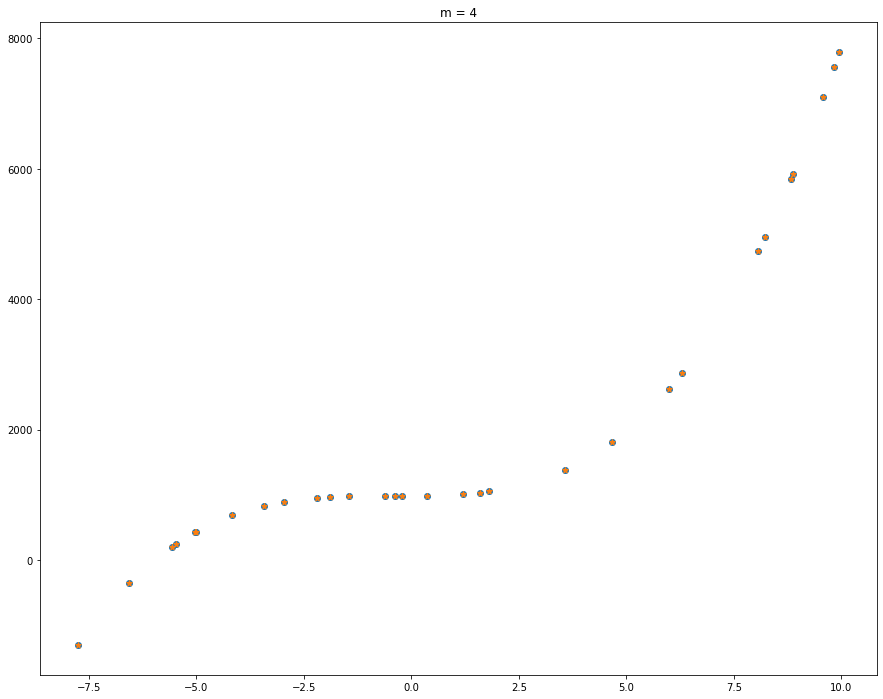

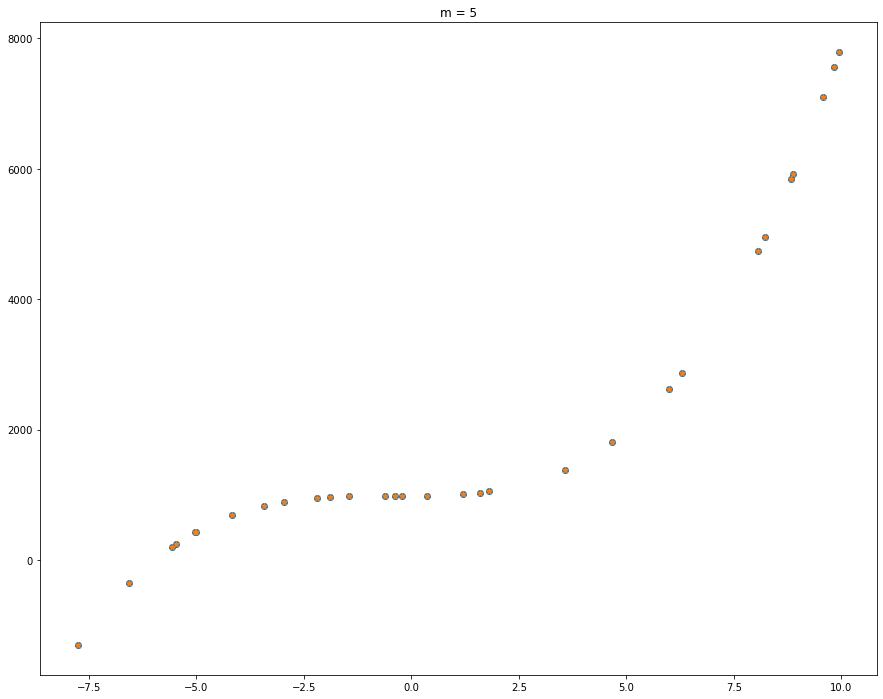

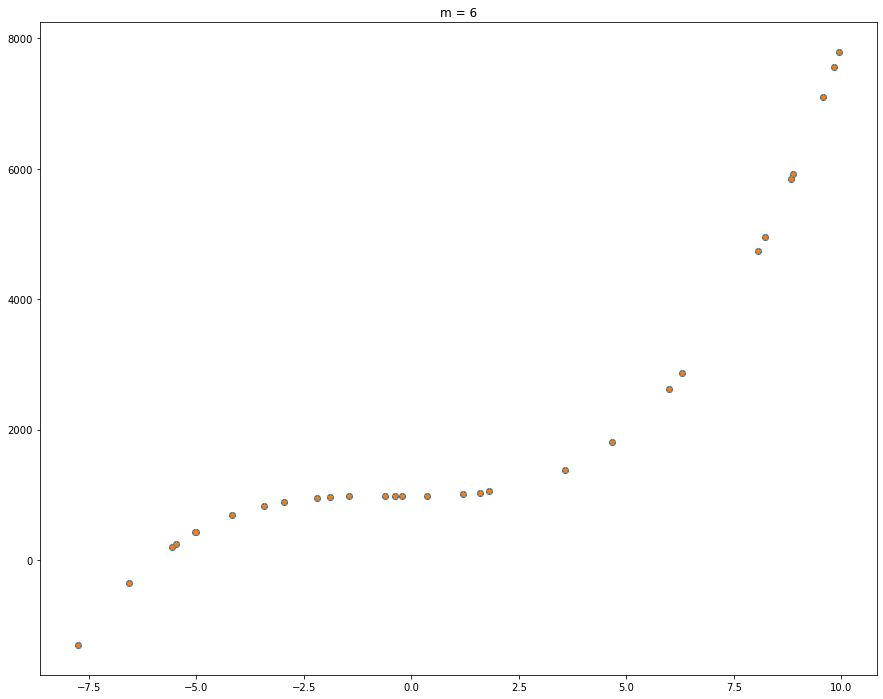

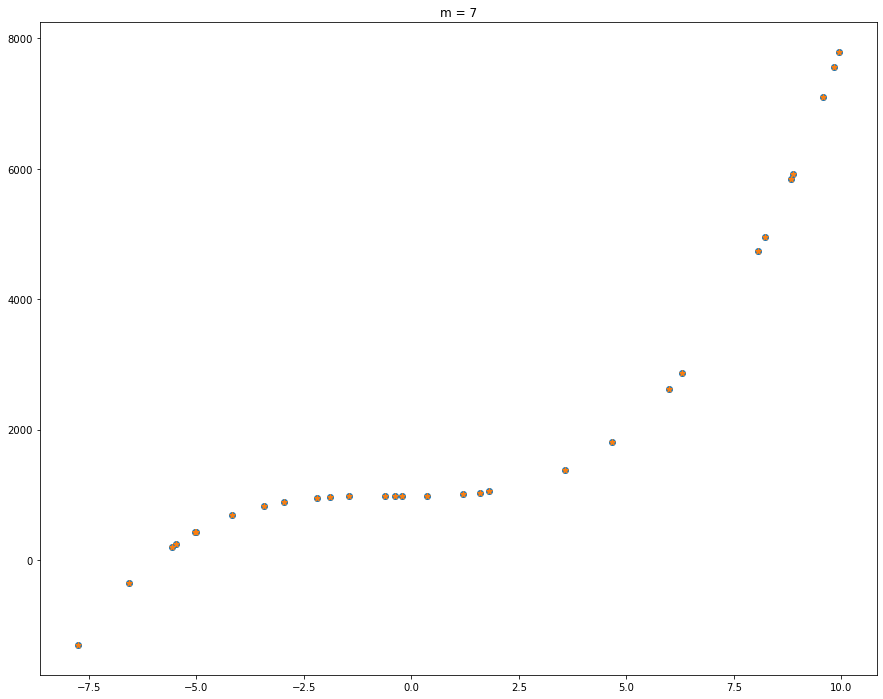

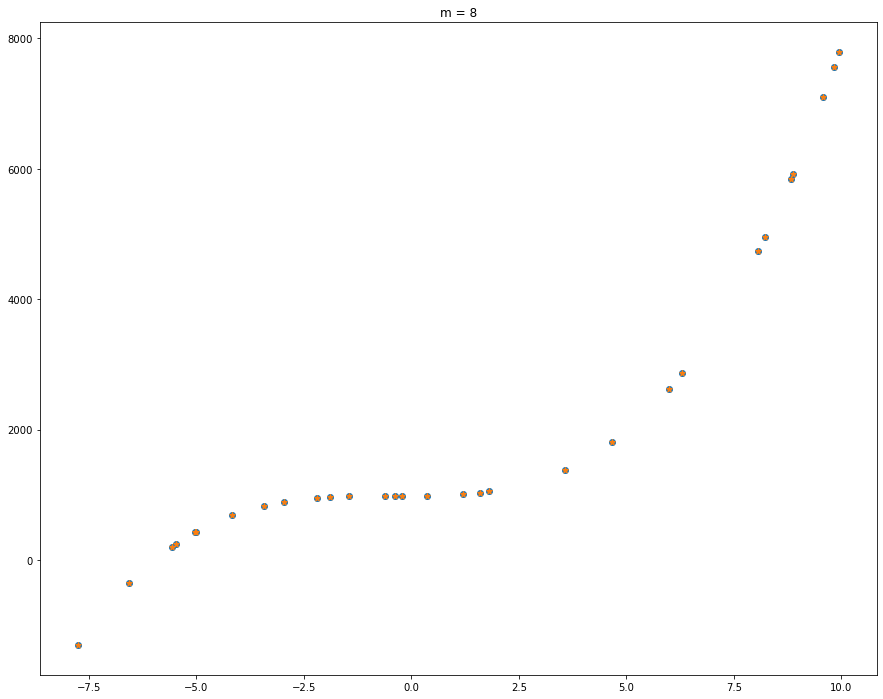

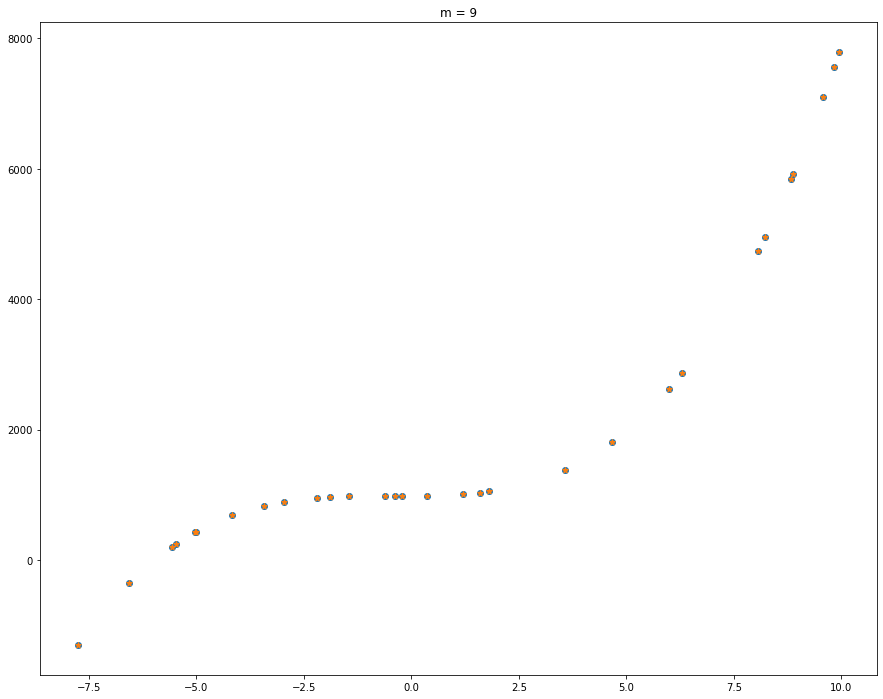

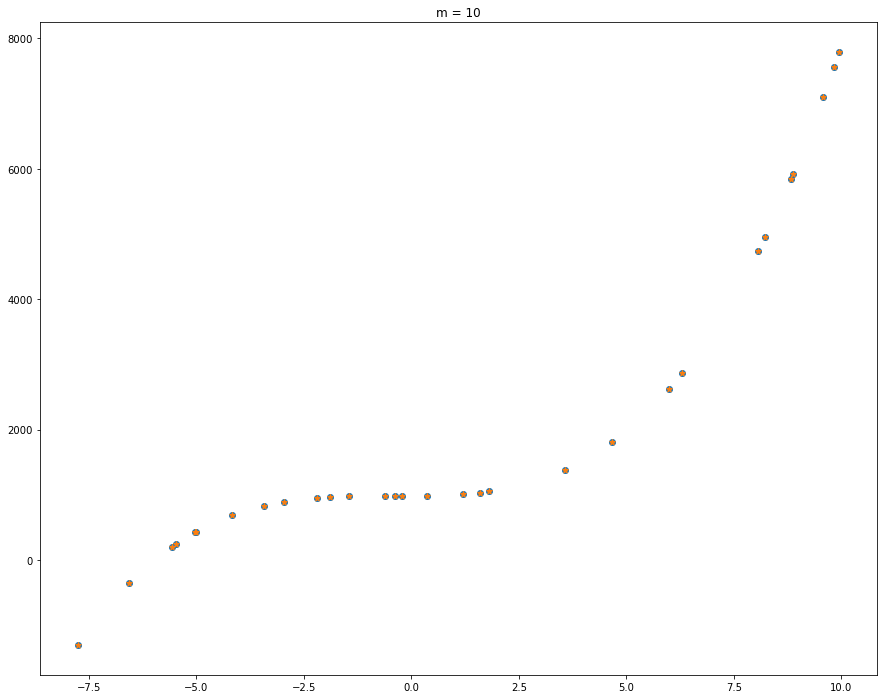

In [24]:
for m in range(3,11):
    diff_m(m, xs, ys)

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [25]:
xs[0]

-1.441462305066171

In [26]:
# Build a loss list as the summation of all previous terms

losses = []
for i in range(len(alphas)):
    running_sum = 0
    temp = (alphas[i][0][0]*xs[i]-ys[i])**2
    losses.append(running_sum + temp)
    running_sum += temp


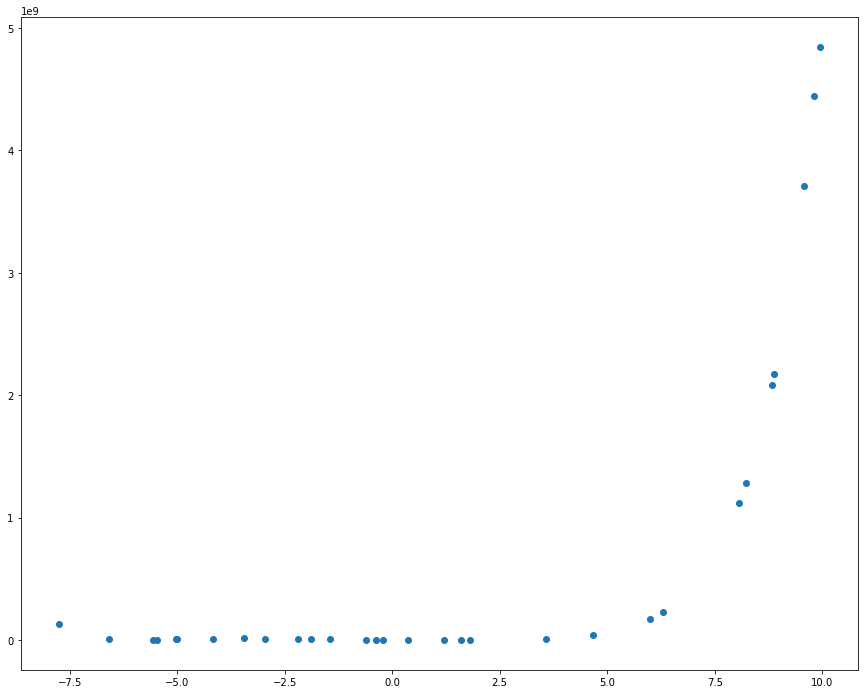

In [27]:
plt.scatter(xs, losses)

In [28]:
def loss_m(m, xs, ys):
    # Build the column vectors of X, make X an array
    vals = []
    for x in xs:
        vals.append(psi(x,m))
    X = np.array(vals)
    
    # Compute the pseudoinverse of X
    XxX_T = np.linalg.pinv(X)
    
    # Compute and extract the alpha values
    alphas = []
    for y in ys:
        alphas.append(XxX_T.dot(X)*y)
    alpha_vals = []
    
    for a in alphas:
        alpha_vals.append(a[0][0])
    
    # Create the list for the summation of loss values

    losses = []
    for i in range(len(alphas)):
        running_sum = 0
        temp = (alphas[i][0][0]*xs[i]-ys[i])**2
        losses.append(running_sum + temp)
        running_sum += temp
            
    plt.scatter(xs, losses)
    plt.title(f'Loss - m = {m}')
    plt.show()

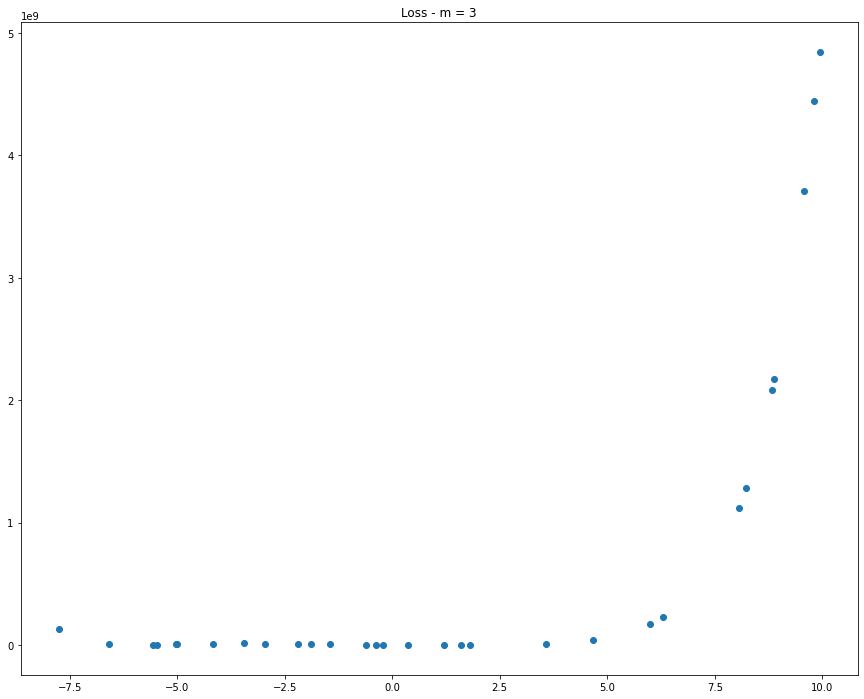

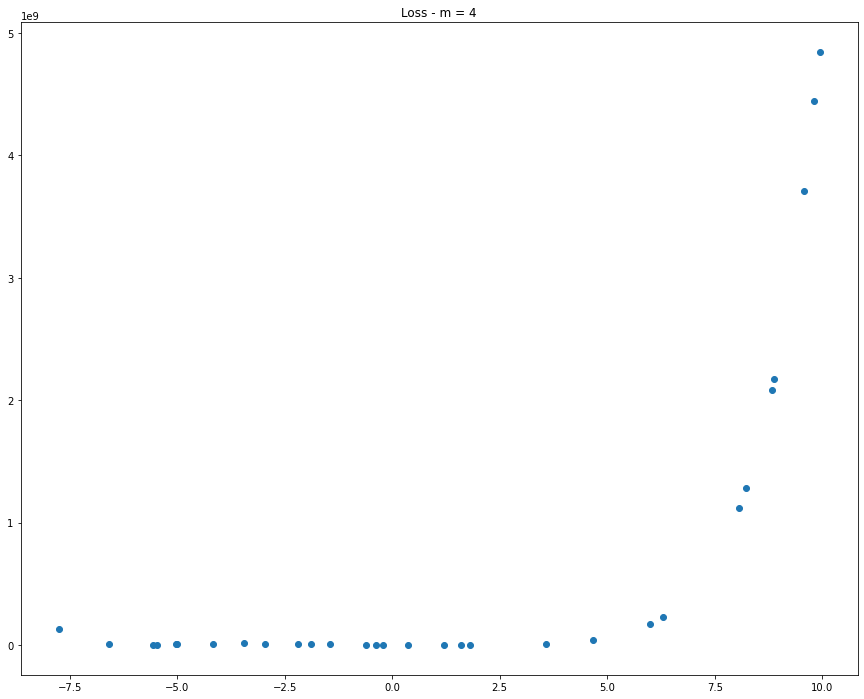

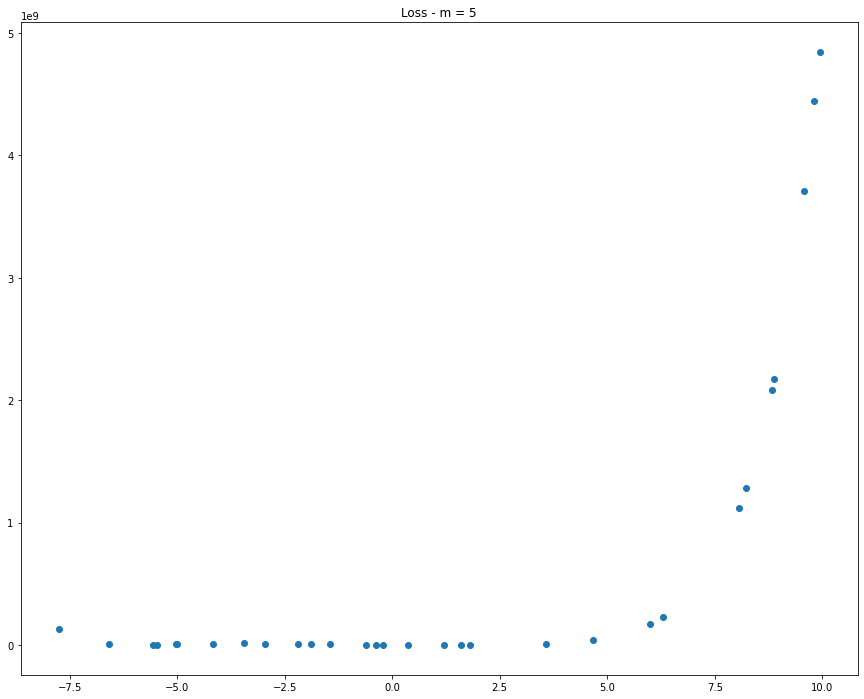

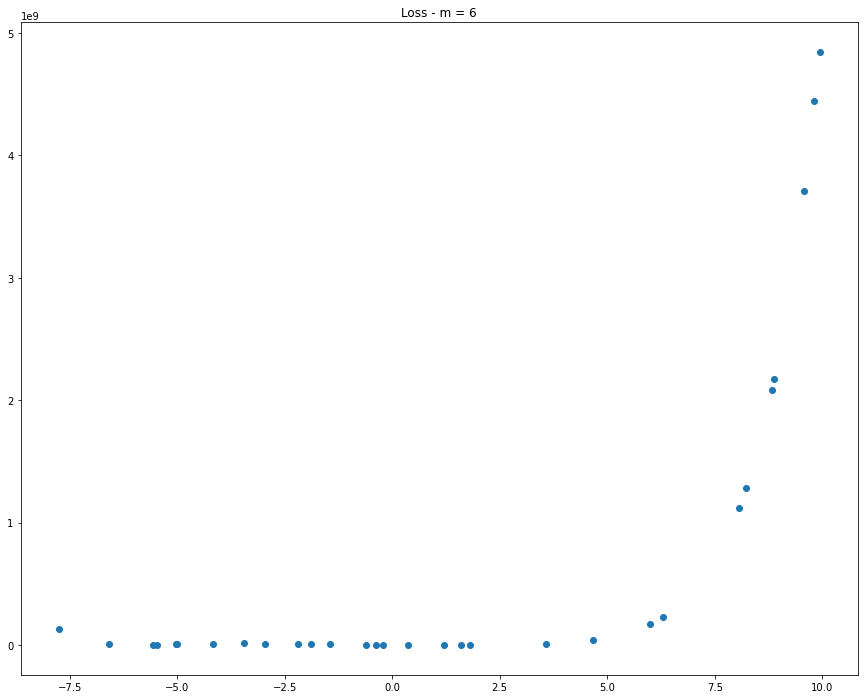

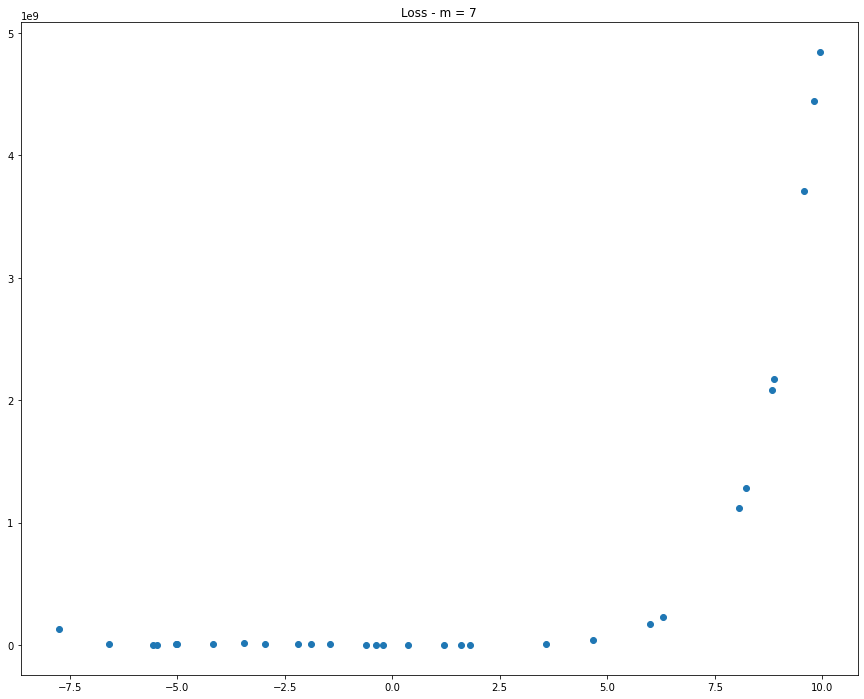

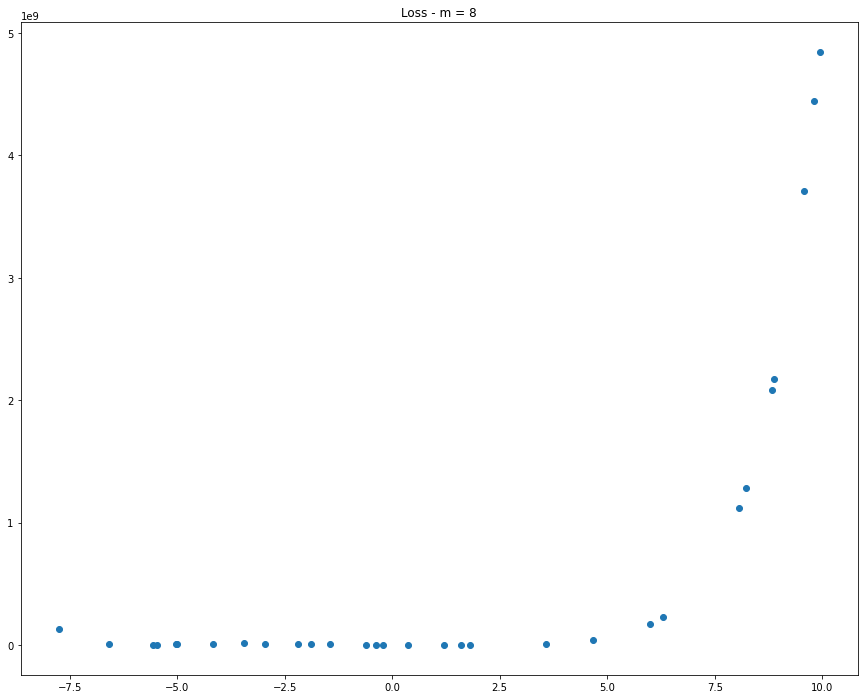

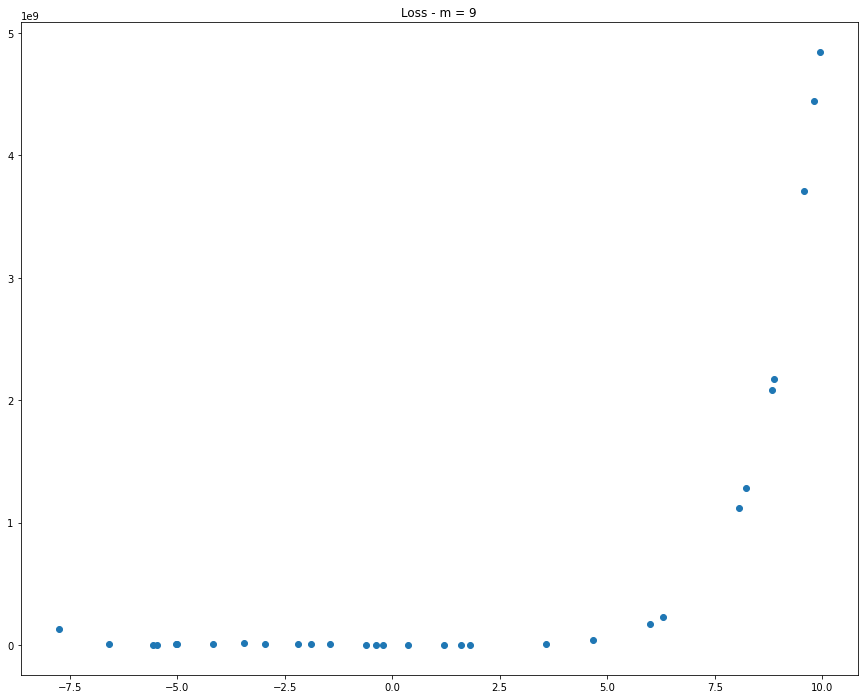

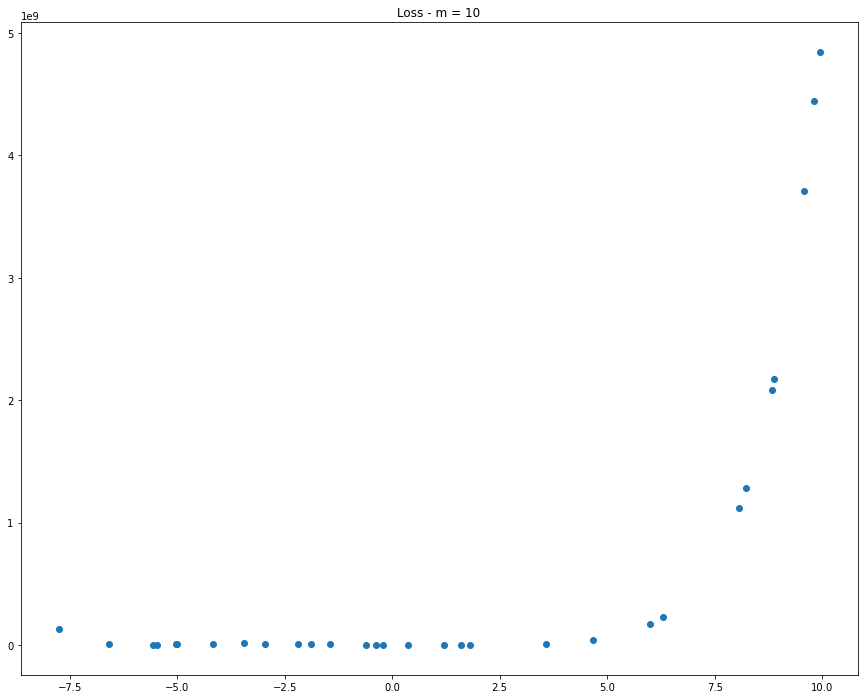

In [29]:
for m in range(3,11):
    loss_m(m, xs, ys)